In [1]:
import numpy as np
import matplotlib.pyplot as plt
import handytools.navigator as nav

In [6]:
def plot_pearson_r2(mtype, key):
    an_metrics = nav.pklload("/src", "results", f"{mtype}_onoff_rotated_key={key}_lw=1", "fit_metrics.pkl")
    an_metrics_array = np.asarray(list(an_metrics.values())) # shape = (# responsive units, # metrics)

    fig = plt.figure(figsize=(9, 3))
    ax1 = fig.add_subplot(131)
    ax1.hist(an_metrics_array[:,0], color="k")

    ax2 = fig.add_subplot(132)
    r2_filtered = np.maximum(an_metrics_array[:,2], 0) # ReLU(r^2)
    ax2.hist(r2_filtered, color="k")

    ax3 = fig.add_subplot(133)
    ax3.scatter(an_metrics_array[:,0], r2_filtered, color="k", s=5)

    ax1.set_title("\u03C1"); ax2.set_title("$r^2$")
    ax3.set_xlabel("\u03C1"); ax3.set_ylabel("$r^2$"); ax3.set_title("$r^2$ vs \u03C1")
    
    mname_dic = {"AN": "Alexnet", "VGG16": "VGG16"}
    key_to_layer = {"AN": {8: "Conv 4", 10:"Conv 5", 15: "Linear 1", 18: "Linear 2"},
                   "VGG16": {8: "Conv 4", 11: "Conv 5", 13: "Conv 6", 16: "Conv 7", 18: "Conv 8", 22: "Linear 1"}}
    plt.suptitle(f"On-Off Invariance for {mname_dic[mtype]} {key_to_layer[mtype][key]} units")
    plt.tight_layout()
    plt.show()
    
    return *an_metrics_array.T, r2_filtered

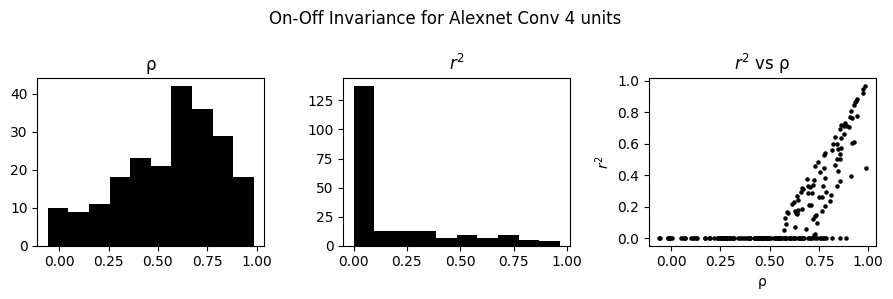

Average r-squared: 0.16898541095825384
Percentage r-squared past 0.7: 0.07834101382488479


In [7]:
pc, _, r2, r2f = plot_pearson_r2("AN", 8)
print(f"Average r-squared: {np.mean(r2f)}")
print(f"Percentage r-squared past 0.7: {sum(r2f >= 0.7)/len(r2f)}")